In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# List of files:
- matrix_3d.npy
- matrix_SEQN.csv
- full_df.csv
- test_IDs.csv
- train_IDs.csv


# Data structure 1: physical_activity_matrix

In [9]:
physical_activity_matrix = np.load('matrix_3d.npy')
matrix_SEQN = pd.read_csv('matrix_SEQN.csv')

**physical_activity_matrix** is a 3-dimensional numpy array. The dimensions represent subjects, days, and acceleration measurements respectively:

- 1st dimension: Index of the subject in the matrix (0-7536). There are 7537 subjects in the database with physical activity recordings.
- 2nd dimension: Index of the day in the matrix (0-based, i.e., 0=Monday, 6=Sunday)
- 3rd dimension: Acceleration measurements. There is one measurement per minute, so 24h/day x 60min/h = 1440. So through this index we can access the acceleration value of a specific minute of the day.

**matrix_SEQN** is a 1-dimensional array that represents the subjects identifiers (SEQN) in the physical_activity_matrix, so it can be used to map the subject's SEQN to the index in the matrix.

In [4]:
physical_activity_matrix.shape

(7537, 7, 1440)

In [16]:
matrix_SEQN.shape

(7537, 1)

In [19]:
matrix_SEQN

,SEQN
0,73557.0
1,73558.0
2,73559.0
3,73560.0
4,73561.0
...,...
7532,83725.0
7533,83727.0
7534,83729.0
7535,83730.0


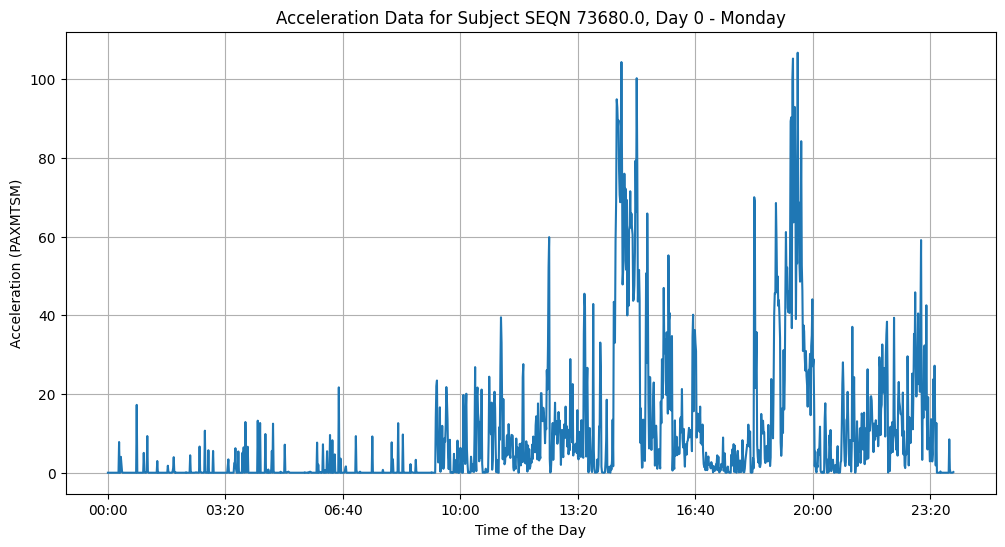

In [15]:
# Accessing a specific subject and day in the matrix. #Subject: [0, 7536], Day: [0, 6] (0=Monday, 6=Sunday)
subject_idx = 100
day_idx = 0 #Monday
selected_subject_day = physical_activity_matrix[subject_idx, day_idx]

# Plotting the acceleration measurements of the selected subject and day
plot_subject_day_data(100, 0, physical_activity_matrix, matrix_SEQN) #Subject: [0, 7536], Day: [0, 6] (0=Monday, 6=Sunday)

Functions to plot the accelerometry data

In [14]:
# Define a custom tick formatter to map minute of the day to time of day
def time_formatter(x, pos):
    """
    Formatter function to convert minute of the day to HH:MM format.
    """
    hours = int(x // 60)
    minutes = int(x % 60)
    return f"{hours:02d}:{minutes:02d}"

def plot_subject_day_data(subject_idx, day_idx, matrix_3d, matrix_SEQN):
    """
    Plot the acceleration data for a specific subject and day, showing the SEQN in the title.
    
    Args:
    - subject_idx (int): Index of the subject in the matrix.
    - day_idx (int): Index of the day in the matrix (0-based, i.e., 0=Monday, 6=Sunday).
    - matrix_3d (numpy array): The 3D matrix containing acceleration data.
    - matrix_SEQN (pandas Series): Series containing the SEQN identifiers.
    """
    
    # Extract data for the given subject and day
    data = matrix_3d[subject_idx, day_idx]
    
    # Get the SEQN for the subject
    subject_SEQN = matrix_SEQN.iloc[subject_idx].item()  # Using .item() to get the value
    
    # Plot
    day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

    plt.figure(figsize=(12, 6))
    plt.plot(data)
    plt.title(f"Acceleration Data for Subject SEQN {subject_SEQN}, Day {day_idx} - {day_names[day_idx]}")
    plt.xlabel("Time of the Day")
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(time_formatter))
    plt.ylabel("Acceleration (PAXMTSM)")
    plt.grid(True)
    plt.show()


# Data structure 2: DataFrame with subject's features

In [21]:
full_df = pd.read_csv('full_df.csv')

In [22]:
full_df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,PAXVMD,PAXWWMD,PAXSWMD,PAXNWMD,PAXUMD,PAXMTSD,PAXLXSD,DXXNK_TSCORE,CLASSES,TARGET_BINARY
0,73557.0,8.0,2.0,1.0,69.0,NaN,4.0,4.0,1.0,NaN,...,1363.145199,373.430133,83.206870,892.967213,13.540984,9539.847404,147601.903468,NaN,NaN,NaN
1,73558.0,8.0,2.0,1.0,54.0,NaN,3.0,3.0,1.0,NaN,...,1406.954723,751.055960,428.131182,161.938053,65.821707,10419.291313,81496.392640,-0.358333,normal,0.0
2,73559.0,8.0,2.0,1.0,72.0,NaN,3.0,3.0,2.0,NaN,...,1350.280250,713.817851,537.837367,25.806922,72.818111,9262.091081,335870.154998,NaN,NaN,NaN
3,73560.0,8.0,2.0,1.0,9.0,NaN,3.0,3.0,1.0,119.0,...,1365.185792,833.217959,440.509005,68.220308,23.221874,22034.825364,180498.950166,NaN,NaN,NaN
4,73561.0,8.0,2.0,2.0,73.0,NaN,3.0,3.0,1.0,NaN,...,1350.100703,732.742842,523.622853,15.277460,78.630141,7292.593313,77089.786076,-1.133333,osteopenia,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9818,83727.0,8.0,2.0,1.0,26.0,NaN,2.0,2.0,2.0,NaN,...,1350.280250,745.625813,444.017955,62.588603,98.047879,13315.549152,562812.787969,NaN,NaN,NaN
9819,83728.0,8.0,2.0,2.0,2.0,24.0,1.0,1.0,2.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9820,83729.0,8.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,1369.483997,810.671090,387.254489,112.359875,59.198543,12024.118144,20216.980965,1.475000,normal,0.0
9821,83730.0,8.0,2.0,1.0,7.0,NaN,2.0,2.0,1.0,84.0,...,1361.438720,888.599581,417.383931,0.000000,55.263544,17461.499029,339115.090791,NaN,NaN,NaN


In [19]:
full_df.shape

(9823, 3511)

The DataFrame full_df contains data for 9823 subjects and over 3500 features. Not all subjects have physical activity data, and there are many NaNs. 
The last 3 columns contain the target information, so they should NOT be included in the feature set. These are:
- DXXNK_TSCORE: Bone mineral density values. This number says how dense your bones are, and it's used to diagnose osteoporosis and osteopenia.	
- CLASSES: According to the bone mineral density, subjects are classified into 3 categories: normal, osteopenia, and osteoporosis.	
- TARGET_BINARY: This is the binary version of the CLASSES column. It's 1 if the subject has osteopenia or osteoporosis, and 0 otherwise.

# Data structure 3: Data Split

The database was split into training and testing sets. The IDs of the subjects in each set are in the files train_IDs.csv and test_IDs.csv respectively.

Before doing the split, the following steps were taken (please check 9_split_dataset.ipynb for more details):
1. Feature selection: 8 features were selected.
2. Subjects with no physical activity data were removed from the database.
3. Subjects with no target information were removed from the database.
4. Subjects with NaN values were removed from the database.

So from the 9823 subjects included in full_df, 2565 made it to this stage. Of which 2052 were used for training and 513 for testing.

In [32]:
train_IDs = pd.read_csv('train_IDs.csv', header=None)
train_IDs.columns = ['SEQN']  # Assign a column name after loading
train_IDs = train_IDs.sort_values(by='SEQN').reset_index(drop=True)

test_IDs = pd.read_csv('test_IDs.csv', header=None)
test_IDs.columns = ['SEQN']  # Assign a column name after loading
test_IDs = test_IDs.sort_values(by='SEQN').reset_index(drop=True)


In [33]:
train_IDs

,SEQN
0,73558.0
1,73561.0
2,73564.0
3,73566.0
4,73567.0
...,...
2047,83701.0
2048,83708.0
2049,83721.0
2050,83723.0


In [35]:
test_IDs

,SEQN
0,73562.0
1,73604.0
2,73626.0
3,73639.0
4,73652.0
...,...
508,83563.0
509,83569.0
510,83632.0
511,83637.0
